# Examen Ordinario - Econometría

## 21 de Enero 2022

APELLIDOS, NOMBRE: LÓPEZ GONZÁLEZ, ANTONIO

### El fichero con las respuestas y códigos debe enviarse a la tarea creada en PRADO para tal efecto.

La base de datos **coches.xlsx** cuenta con una muestra de datos sobre de 205 coches. La base de datos cuenta con las siguientes información:
- _Precio_: Precio de venta del coche (en euros).
- _Diesel_: Toma el valor **1** si elcoche es diésel y **0** si es gasolina.
- _Turbo_: **1** si el coche turbo y **0** si es estándard.
- _Puertas_: Número de puertas del coche.
-  _DistanciaEjes_: Distancia entre los ejes.
- _Largo_, _Ancho_ y _Alto_: largo, ancho y alto del coche.
- _Cilindros_: número de cilindros
- _Motor_: Tamaño del motor.
- _TasaCompresion_: Tasa de compresión del coche.
- _PotenciaCV_: Potencia del coche en CV.
- _GamaA_: **1** si el coche es una marca de gama alta y **0** si no.

Responde de forma justificada a las siguientes cuestiones (cada una de ellas tiene una valoración de 1 punto).

### Ejercicio 1
Especifica un modelo de regresión lineal para explicar el precio de los coches de la base de datos en base a $3$ de las variables disponibles (excepto _GamaA_). Estima el modelo especificado e interpreta los coeficientes estiados obtenidos.

In [1]:
##Código:
import pandas as pd
import statsmodels.api as sm #para mco

datos = pd.read_excel('coches.xlsx')
#print(datos)

y=datos['Precio']
X=datos[['Motor','TasaCompresión','PotenciaCV']]

mco = sm.OLS(y,sm.add_constant(X)).fit()
mco.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Precio   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     239.1
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           4.88e-66
Time:                        17:18:02   Log-Likelihood:                -1978.0
No. Observations:                 205   AIC:                             3964.
Df Residuals:                     201   BIC:                             3977.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.013e+04   1115.951     -9.077      0.000   -1.23e+04   -7929.234
Motor            138.7089      9.878     14.043      0.000     119.232     158.186
TasaCompresión   177.4339     70.874      2.504      0.013      37.682     317.186
PotenciaCV        37.9257      9.658      3.927      0.000      18.882      56.970
==============================================================================
Omnibus:                       11.116   Durbin-Watson:                   0.825
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               21.650
Skew:                           0.203   Prob(JB):                     1.99e-05
Kurtosis:                       4.540   Cond. No.                         738.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Respuesta:
He creado un modelo de regresión lineal, el cual explica la variable endógena (precio) en base a tres variables exógenas (motor, tasa de compresión y potencia en cv). Como podemos observar por el valor de Prob(Fstatitic) que es muy inferior a 0.05, hemos conseguido un modelo con una buena significación global, por otro lado fijándonos en el valor de R^2 podemos decir que tenemos un buen ajuste de variables al ser superior a 0.5.
A su vez si nos fijamos en el pvalor de cada una de las variables podemos afirmar haber escogido todas con una buena significación individual al ser este inferior en todas a 0.05.
Por último si nos fijamos en los coeficientes de las variables podemos decir que todas modifican positivamente y en gran manera el valor del precio.



### Ejercicio 2

Aplica algún test de hipótesis que te permita contrastar si existen diferencias entre el comportamiento de las valoraciones en base a las variables escogidas para los coches de gama alta y los que no. Explica el test que has aplicado e interpreta los resultados obtenidos.

In [2]:
##Código:
datos = pd.read_excel('coches.xlsx')
#print(datos)
SCR=mco.ssr  #SCR del total de los datos

datos_gamaA=datos[datos["GamaA"]==1]  #modelo para los coches de GamaA
Y_gamaA=datos_gamaA["Precio"]
X_gamaA=datos_gamaA[['Motor','TasaCompresión','PotenciaCV']]
mco_gamaA=sm.OLS(Y_gamaA, sm.add_constant(X_gamaA)).fit()
SCRgamaA=mco_gamaA.ssr


datos_NgamaA=datos[datos["GamaA"]==0]  #modelo para los coches que no son de GamaA
Y_NgamaA=datos_NgamaA["Precio"]
X_NgamaA=datos_NgamaA[['Motor','TasaCompresión','PotenciaCV']]
mco_NgamaA=sm.OLS(Y_NgamaA, sm.add_constant(X_NgamaA)).fit()
SCRNgamaA=mco_NgamaA.ssr



n=len(datos)
k=3 #numero variables

Fexp=(n-2*k-2)/(k+1) * (SCR - (SCRgamaA+SCRNgamaA))/(SCRgamaA+SCRNgamaA)
Fexp

from scipy import stats
Fteo= stats.f.ppf(1-0.05, k+1, n-2*k-1)

print(Fexp, Fteo) #se rechaza que GamaA y NgamaA son iguales si Fexp>Fteo
#print(datos)


34.16388736102461 2.4172577311469907


Respuesta:
He utilizado el test de Chow que nos permiten saber si hay diferencias en las valoraciones de un modelo en función de cómo varie otra de nuestras variables exógenas no incluida en el modelo. Como podemos observar Fexp es mayor que Fteo por lo que debemos rechazar la hipótesis nula de que el modelo sirva igual para explicar el precio de los coches que son de alta gama como para los que no lo son. Esto nos da a entender que con esta variable se podría explicar mejor por separado que unificadamente.



### Ejercicio 3

Analiza si los datos presentan un problema de multicolinealidad con las medidas de detección que conozcas, y en caso de existir este problema, explica cómo puedes paliar el problema en el modelo.

In [3]:
##Código:
mco.condition_number

import statsmodels.stats.outliers_influence as oi

vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]  # factor de inflación de la varianza
vifs


[23.337332287081118, 4.975713788459642, 16.168947165257922]

Respuesta:
Para analizar la posibilidad de que nuestro modelo tenga problemas de multicolinealidad he utilizado dos métodos de detección:
1.Número de condición el cual es bastante superior a 30 indicándonos así un posible problema preocupante de multicolinealidad pero es inferior a 900, lo que nos dice que no debría haber problema.
2.Factor de inflación de la varianza el cual como vemos es superior a 10 en dos de nuestras variables, dándonos a entender que si que tenemos problemas de multicolinealidad por este lado. Podemos descartar el hecho de que esta sea de carácter no esencial ya que esta medida no relaciona las variables exógenas con la constante.

Este problema de multicolinealidad como ya he explicado, tiene que ver con la relación que tienen entre sí las propias variables exógenas, es decir, es de carácter esencial, lo que nos deja pocas soluciones para paliar con el problema. La solución más coherente sería hacer otra combinación de variables exógenas y ver como varían los vifs, pero lo he hecho con la mayoría de variables disponibles y en la totalidad de los casos, alguna de las variables tenía sus vifs por encima de 10.


### Ejercicio 4

Extrae los residuos de tu modelo y chequea si estos siguen una distribución normal gráficamente y con algún test de hipótesis ¿Que consecuencias tendría en tu modelo que no se cumpliera esta hipótesis? Justifica detalladamente la respuesta.

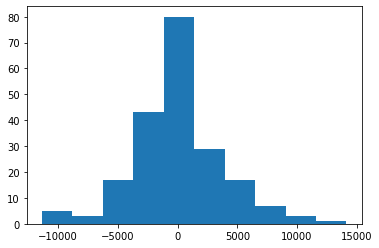

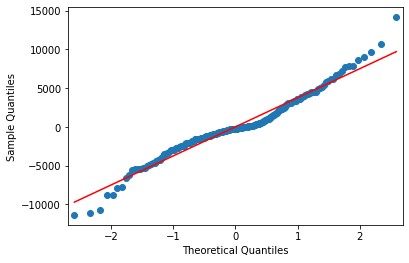

In [4]:
##Código:
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot
pyplot.hist(mco.resid)
pyplot.show()
qqplot(mco.resid, line='s')
pyplot.show()



Respuesta:
Como podemos observar en los gráficos, claramente los residuos de nuestro modelo siguen una distribución normal. Si no se cumpliese esta hipótesis, con nuestro modelo no podríamos realizar la inferencia sobre los parámetros de nuestro modelo, es estrictamente necesario que nuestros residuos sigan una distribución normal de media 0 y varianza constante.



### Ejercicio 5

¿En qué consiste el test de Glejser y qué permite detectar? Aplícalo a tus datos con alguna de las variables que sospeches que podría suponer un problema y comenta los resultados obtenidos.

In [6]:
##Código:
z = X['PotenciaCV']
#print(z)
for h in [1,2,3,4,5,6]:
    mcoaux = sm.OLS(abs(mco.resid), sm.add_constant(z**h)).fit()
    pval = mcoaux.pvalues[1]
    print('h:',h,'-> pvalt:',pval,';R2:',mcoaux.rsquared)


h: 1 -> pvalt: 3.01369491198242e-25 ;R2: 0.41266117486210185
h: 2 -> pvalt: 6.672272712023936e-23 ;R2: 0.3808069186675981
h: 3 -> pvalt: 2.8332487025989885e-18 ;R2: 0.3129101750863592
h: 4 -> pvalt: 3.71478722018021e-14 ;R2: 0.24649178587263776
h: 5 -> pvalt: 2.3294237217487863e-11 ;R2: 0.19795674177362776
h: 6 -> pvalt: 1.340436795710651e-09 ;R2: 0.16597497582260856


Respuesta:
El test de Glejser consite en analizar individualmente durante un intervalo de h(parámetro que contiene este test, que se eleva a las variables) las variables de nuestro modelo para saber donde está nuestro problema de heteroscedasticidad.
Como resultado de este test, vemos que efectivamente nuestra variable PotenciaCV de la cual sospechaba tiene problemas de heterocedasticidad, centrados sobre todo en h=1 ya que tiene el valor de R^2 mayor y menor pvalor.
Para la resolución de este problema podríamos utilizar el método de Mínimos Cuadrados Ponderados.



### Ejercicio 6

Explica en qué consiste el problema de Autocorrelación. Justifica si existe este problema en tu modelo, y en caso afirmativo, aplica alguna técnica para su corrección.

In [7]:
##Código:
from statsmodels.stats.stattools import durbin_watson
dw=durbin_watson(mco.resid)  #para realizar el test
dw


0.8247838981700938

Respuesta:
El problema de autocorrelación consiste en errores en la especificación del modelo que pueden dar lugar a ciclos y tendencias, además de relaciones no lineales y dinámicas. Para conocer si tenemos un problema sobre ello he utilizado el test de Durbin-Watson, el cual nos da un valor de aproximadamente 0, por lo que podemos afirmar que tenemos problemas de autocorrelación negativa.
Para la corrección de este podemos utilizar tanto el método de Mínimos Cuadrados Generalizados como el de Prais-Winsten.

### Ejercicio 7

Realiza una predicción utilizando tu modelo. Calcula los intervalos de confianza al 95% para el valor individual y el valor esperado de la predicción escogida. Comenta el resultado obtenido.

In [ ]:
##Código:



Respuesta:


